In [29]:
import pandas as pd
import numpy as np
import re
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('../uber_data/GCC_nodes.csv', index_col=0)

In [78]:
df.head()

,X1,X2,X3
1,6,[-121.94843241 38.36665327],"100 Carlsbad Circle, Vacaville"
2,7,[-121.99610391 38.32584685],"Unnamed Road, Vacaville"
3,9,[-122.416533 37.78570262],"500 Hyde Street, Tenderloin, San Francisco"
4,11,[-121.97494123 37.76418646],"0 Mesa Vista Court, San Ramon"
5,13,[-121.2415853 38.75506963],"1400 Eureka Road, Lead Hill, Roseville"


In [86]:
location = (df['X2'])
location;

In [132]:
n = location.shape[0]
points = []
for i in range(n):
    coordinates = re.findall(".[0-9]*[.][0-9]*", location.iloc[i])
    points.append([float(coordinates[0]), float(coordinates[1])])

In [133]:
points = np.array(points)

In [134]:
points

array([[-121.94843241,   38.36665327],
       [-121.99610391,   38.32584685],
       [-122.416533  ,   37.78570262],
       ..., 
       [-121.46991943,   38.46235741],
       [-121.94562931,   38.2787159 ],
       [-122.17975679,   38.76088286]])

In [135]:
tri = Delaunay(points)

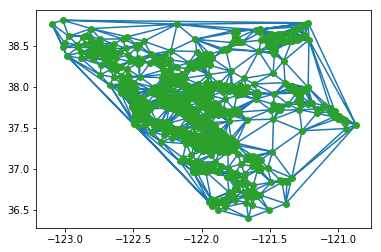

In [136]:
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()